In [117]:
from lxml import etree
import glob
from os import path
from collections import Counter
from xml_tools import get_keywords
import pandas as pd
from matplotlib import pyplot as plt
import networkx as nx
import community


In [2]:

xmls = glob.glob('../articles_from_tatiana/batch3_header_xml/*.xml')

xmls[:10]

['../articles_from_tatiana/batch3_header_xml/Grieger 2003.xml',
 '../articles_from_tatiana/batch3_header_xml/Xu et al 2020.xml',
 '../articles_from_tatiana/batch3_header_xml/Cao et al 2019.xml',
 '../articles_from_tatiana/batch3_header_xml/Mantin et al 2014.xml',
 '../articles_from_tatiana/batch3_header_xml/Li 2020.xml',
 '../articles_from_tatiana/batch3_header_xml/Shen et al 2019.xml',
 '../articles_from_tatiana/batch3_header_xml/Avinadav et al 2015b.xml',
 '../articles_from_tatiana/batch3_header_xml/Hua et al 2020.xml',
 '../articles_from_tatiana/batch3_header_xml/Zhen et al 2020.xml',
 '../articles_from_tatiana/batch3_header_xml/Avinadav et al 2020b.xml']

In [11]:
article_kws_dict = {path.basename(x).split('.')[0]: list(get_keywords(x)) for x in xmls}

In [12]:
article_kws_dict.__repr__()[:500]

"{'Grieger 2003': ['supply chain management', 'electronic marketplaces', 'electronic business', 'relationships', 'electronic commerce', 'information technology'], 'Xu et al 2020': ['delivery time', 'marketplace mode', 'platform power', 'coordination'], 'Cao et al 2019': ['trade-in strategy', 'b2c platform', 'dual-format retailing model', 'sales efforts'], 'Mantin et al 2014': ['marketing channels', 'dual-format retailing', 'third-party marketplaces', 'internet retailing', 'bargaining'], 'Li 2020'"

In [6]:
df=pd.read_excel('../Grouped keyword_terms.xlsx')
df.head()

,frequency,term,new term,GROUP,Unnamed: 4
0,2,agency contract,NaN,1,agency model
1,1,agency model,NaN,1,NaN
2,3,agency selling,NaN,1,NaN
3,1,commission fee,NaN,1,NaN
4,1,consignment,NaN,1,NaN


In [33]:
kw_to_group_mapping = dict(zip(df.term,df.GROUP.map(lambda x: {
    float: lambda: -1, 
    str: lambda: int(x.split(',')[0]),
    int: lambda: x
    }[type(x)]())))

print([kw_to_group_mapping[t] for t in ['agency contract','dynamic programming','content analysis']])

[1, 14, -1]


In [76]:
group_list = sorted(set(kw_to_group_mapping.values()))
group_list

[-1,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38]

In [79]:
[k for k,v in article_kws_dict.items() if 'game theory' in v] 

['Alaei et al 2020',
 'Yan et al 2018',
 'Avinadav et al 2015a',
 'Chen et al 2019',
 'Yan et al 2019',
 'Avinadav et al 2017',
 'Zhang and Zhang 2020',
 'Chen et al 2020',
 'Abhishek et al 2016',
 'Ryan et al 2012',
 'De Giovanni 2020']

In [34]:
article_groups = {k: Counter([kw_to_group_mapping[a] for a in v]) for k,v in article_kws_dict.items()}

In [ ]:
[article_groups[k][]

In [70]:
article_adj=pd.DataFrame(data=[{**{'article': k}, **{f'group{i}': v[i] for i in range(1,39)}} for k, v in article_groups.items()])
article_adj.head()

,article,group1,group2,group3,group4,group5,group6,group7,group8,group9,...,group29,group30,group31,group32,group33,group34,group35,group36,group37,group38
0,Grieger 2003,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,Xu et al 2020,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Cao et al 2019,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,Mantin et al 2014,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Li 2020,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [91]:
valid_groups = list(article_adj.loc[:,"group1":].columns[article_adj.loc[:,"group1":].sum()>1]

Index(['group1', 'group2', 'group3', 'group4', 'group5', 'group6', 'group7',
       'group10', 'group11', 'group12', 'group13', 'group14', 'group15',
       'group16', 'group17', 'group18', 'group19', 'group20', 'group21',
       'group22', 'group23', 'group24', 'group25', 'group27', 'group28',
       'group29', 'group30', 'group31', 'group32', 'group33', 'group34',
       'group35', 'group36', 'group37', 'group38'],
      dtype='object')

In [92]:
valid_groups = list(article_adj.loc[:,"group1":].columns[article_adj.loc[:,"group1":].sum()>1])
print(valid_groups)

article_group_dense = article_adj[['article']+valid_groups]

['group1', 'group2', 'group3', 'group4', 'group5', 'group6', 'group7', 'group10', 'group11', 'group12', 'group13', 'group14', 'group15', 'group16', 'group17', 'group18', 'group19', 'group20', 'group21', 'group22', 'group23', 'group24', 'group25', 'group27', 'group28', 'group29', 'group30', 'group31', 'group32', 'group33', 'group34', 'group35', 'group36', 'group37', 'group38']


In [93]:
adj_mat=(article_group_dense.loc[:,"group1":].values >0).astype(int)

Counter(adj_mat.reshape(-1))

Counter({0: 1861, 1: 204})

In [94]:
adj_mat.shape

(59, 35)

In [95]:
adj_mat.sum(axis=0)

array([17,  6,  9,  2,  4,  5,  6,  2, 10,  4, 13,  8, 30, 11,  2,  5,  6,
        5,  4,  3,  1,  2,  3,  3,  2,  2, 19,  2,  2,  1,  2,  5,  2,  4,
        2])

In [96]:
adj_mat.sum(axis=1)

array([3, 3, 4, 4, 3, 3, 4, 3, 2, 5, 4, 0, 4, 0, 4, 1, 5, 3, 4, 6, 4, 4,
       3, 3, 0, 4, 4, 5, 7, 4, 3, 4, 4, 4, 3, 3, 2, 1, 4, 3, 6, 3, 0, 5,
       4, 3, 5, 3, 5, 2, 4, 4, 4, 2, 4, 2, 3, 4, 7])

In [107]:
group_adj_mat = adj_mat.T @ adj_mat
group_adj_mat.shape
for i in range(group_adj_mat.shape[0]):
    group_adj_mat[i,i]=0

#group_adj_mat[14,:] = 0
#group_adj_mat[:, 14] = 0


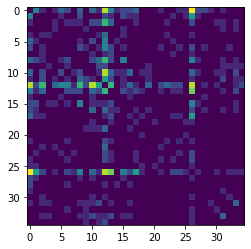

In [108]:
plt.imshow(group_adj_mat)

In [109]:
Counter(group_adj_mat.reshape(-1))

Counter({0: 879, 4: 14, 1: 216, 3: 28, 2: 66, 8: 6, 9: 2, 5: 6, 6: 6, 7: 2})

In [115]:
groupGraph = nx.Graph(group_adj_mat)
groupGraph = nx.relabel_nodes(groupGraph,dict(enumerate(valid_groups)))
groupGraph.edges

EdgeView([('group1', 'group2'), ('group1', 'group3'), ('group1', 'group5'), ('group1', 'group6'), ('group1', 'group7'), ('group1', 'group11'), ('group1', 'group13'), ('group1', 'group14'), ('group1', 'group15'), ('group1', 'group16'), ('group1', 'group17'), ('group1', 'group18'), ('group1', 'group19'), ('group1', 'group20'), ('group1', 'group24'), ('group1', 'group28'), ('group1', 'group29'), ('group1', 'group30'), ('group1', 'group31'), ('group1', 'group32'), ('group1', 'group33'), ('group1', 'group35'), ('group2', 'group6'), ('group2', 'group11'), ('group2', 'group15'), ('group2', 'group16'), ('group2', 'group18'), ('group2', 'group19'), ('group2', 'group20'), ('group2', 'group27'), ('group2', 'group29'), ('group2', 'group30'), ('group2', 'group31'), ('group3', 'group5'), ('group3', 'group7'), ('group3', 'group10'), ('group3', 'group11'), ('group3', 'group13'), ('group3', 'group14'), ('group3', 'group15'), ('group3', 'group16'), ('group3', 'group20'), ('group3', 'group25'), ('group3'

0.1549274049896009

In [142]:
rs=1001
#for rs in range(1000,1010):
partition = community.best_partition(groupGraph,random_state=rs)
print(community.modularity(partition,groupGraph))

inverse_group_partition = {}
for k, v in partition.items():
    inverse_group_partition[v] = inverse_group_partition.get(v,[])+[k]

inverse_group_partition

0.1549274049896009


{0: ['group1',
  'group2',
  'group10',
  'group16',
  'group20',
  'group21',
  'group23',
  'group24',
  'group27',
  'group28',
  'group29',
  'group30',
  'group31'],
 1: ['group3',
  'group5',
  'group6',
  'group13',
  'group15',
  'group17',
  'group19',
  'group22',
  'group25',
  'group32',
  'group34'],
 2: ['group4',
  'group7',
  'group11',
  'group12',
  'group14',
  'group18',
  'group33',
  'group35',
  'group36',
  'group37',
  'group38']}

In [122]:
article_adj_mat = adj_mat @ adj_mat.T
print(article_adj_mat.shape)
for i in range(article_adj_mat.shape[0]):
    article_adj_mat[i,i]=0

#group_adj_mat[14,:] = 0

(59, 59)


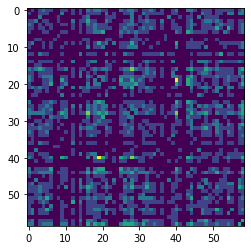

In [123]:
plt.imshow(article_adj_mat)

In [131]:
articleGraph = nx.Graph(article_adj_mat)
articleGraph = nx.relabel_nodes(articleGraph,dict(article_adj.article))
list(articleGraph.edges)[::10]

[('Grieger 2003', 'Xu et al 2020'),
 ('Grieger 2003', 'Yenipazarli 2020'),
 ('Grieger 2003', 'Zennyo 2020'),
 ('Grieger 2003', 'Qin et al 2020b'),
 ('Xu et al 2020', 'Mantin et al 2014'),
 ('Xu et al 2020', 'He et al 2021'),
 ('Xu et al 2020', 'Renna 2010'),
 ('Xu et al 2020', 'Luo et al 2020'),
 ('Cao et al 2019', 'Yan et al 2019'),
 ('Cao et al 2019', 'Guo et al 2020'),
 ('Mantin et al 2014', 'Liu et al 2020'),
 ('Mantin et al 2014', 'Shen et al 2020'),
 ('Mantin et al 2014', 'Lin et al 2020'),
 ('Li 2020', 'Schlosser and Boissier 2018'),
 ('Li 2020', 'Yan et al 2019'),
 ('Li 2020', 'Shen et al 2019b'),
 ('Li 2020', 'Ryan et al 2012'),
 ('Shen et al 2019', 'He et al 2021'),
 ('Shen et al 2019', 'Shen et al 2020'),
 ('Shen et al 2019', 'Guo et al 2020'),
 ('Avinadav et al 2015b', 'Yan et al 2018'),
 ('Avinadav et al 2015b', 'Lu et al 2018'),
 ('Avinadav et al 2015b', 'Abhishek et al 2016'),
 ('Hua et al 2020', 'Xu et al 2018'),
 ('Zhen et al 2020', 'Shen et al 2019b'),
 ('Avinadav et 

In [163]:
rs=1007
# for rs in range(1000,1020):
partition = community.best_partition(articleGraph,random_state=rs)
print(community.modularity(partition,articleGraph))

inverse_article_partition = {}
for k, v in partition.items():
    inverse_article_partition[v] = inverse_article_partition.get(v,[])+[k]

inverse_article_partition[-1] = []
for k,v in inverse_article_partition.items():
    if len(v) ==1 :
        inverse_article_partition[-1] += v

inverse_article_partition = {k: v for k, v in inverse_article_partition.items() if len(v)>1 }

inverse_article_partition

0.16042539004447154


{0: ['Grieger 2003',
  'Li 2020',
  'Avinadav et al 2015b',
  'Avinadav et al 2020b',
  'Alaei et al 2020',
  'Yan et al 2018',
  'Liu et al 2020',
  'Avinadav et al 2020',
  'Avinadav et al 2015a',
  'Chernonog 2020',
  'Choi et al 2004',
  'Yan et al 2019',
  'Avinadav et al 2017',
  'Zhang and Zhang 2020',
  'Avinadav et al 2019',
  'Shen et al 2019b',
  'Zhao and Bisi 2010',
  'de Matta et al 2017',
  'Yu and Zhang 2017',
  'De Giovanni 2020'],
 1: ['Xu et al 2020',
  'Mantin et al 2014',
  'Shen et al 2019',
  'Wang et al 2020',
  'Schlosser and Boissier 2018',
  'Yenipazarli 2020',
  'He et al 2021',
  'Chen et al 2019',
  'Zennyo 2020',
  'Li et al 2019',
  'Cao et al 2020',
  'Shen et al 2020',
  'Zhou et al 2019',
  'Renna 2010',
  'Li et al 2016',
  'Qin et al 2020b',
  'Abhishek et al 2016',
  'Hagiu and Wright 2020',
  'Yu et al 2020',
  'Lin et al 2020',
  'Qin et al 2020',
  'Luo et al 2020',
  'Ryan et al 2012'],
 2: ['Cao et al 2019',
  'Hua et al 2020',
  'Zhen et al 2

In [150]:
clusters_from_references = {0: ['Cao et al 2020',
  'Chen et al 2020',
  'Wang et al 2019',
  'Cao et al 2019',
  'Zhen et al 2020',
  'Mantin et al 2014',
  'Shen et al 2019',
  'Yenipazarli 2020',
  'Tian et al 2018',
  'Ryan et al 2012',
  'de Matta et al 2017',
  'Zhang and Zhang 2019',
  'Shen et al 2019b',
  'Zhang and Zhang 2020',
  'Yan et al 2019',
  'Yan et al 2018',
  'Abhishek et al 2016'],
 1: ['Li et al 2019',
  'Chen et al 2019',
  'Qin et al 2020',
  'Zennyo 2020',
  'He et al 2020',
  'Li 2020',
  'Cai and Lo 2020',
  'Alaei et al 2020',
  'Xu et al 2020',
  'Qin et al 2020b',
  'Li et al 2020',
  'Guo et al 2020',
  'He et al 2021',
  'Liu et al 2020',
  'Shen et al 2020',
  'Geng et al 2018'],
 -1: ['De Giovanni 2020',
  'Sun et al 2020',
  'Hagiu and Wright 2020',
  'Xu et al 2018',
  'Jiang et al 2017',
  'Hua et al 2020',
  'Li et al 2016',
  'Grieger 2003',
  'Lin et al 2020',
  'Renna 2010',
  'Schlosser and Boissier 2018',
  'Zhou et al 2019',
  'Yu and Zhang 2017',
  'Wang et al 2020',
  'Choi et al 2004',
  'Lu et al 2018',
  'Zhao and Bisi 2010',
  'Luo et al 2020'],
 8: ['Avinadav et al 2015a',
  'Avinadav et al 2017',
  'Avinadav et al 2019',
  'Avinadav et al 2015b',
  'Chernonog 2020',
  'Avinadav et al 2020b',
  'Avinadav et al 2020']}

In [164]:
from itertools import product
def compare_sets(d1, d2):
    for k1, k2, in product(d1.keys(), d2.keys()):
        v1,v2 = d1[k1], d2[k2]
        joint = len(set(v1) & set(v2))
        if joint and len(v2) > 1:
            yield k1, k2, len(v1), len(v2), joint

In [165]:
pd.DataFrame(compare_sets(clusters_from_references,inverse_article_partition))

,0,1,2,3,4
0,0,0,17,20,5
1,0,1,17,23,6
2,0,2,17,12,4
3,0,-1,17,4,2
4,1,0,16,20,3
5,1,1,16,23,8
6,1,2,16,12,4
7,1,-1,16,4,1
8,-1,0,18,20,5
9,-1,1,18,23,8


In [185]:
keyword_clusters = {}
for group, articles in inverse_article_partition.items():
    kws = Counter()
    for article in articles:
        kws.update(article_kws_dict[article])
    keyword_clusters[group] = kws




In [188]:
[kc.most_common(8) for kc in keyword_clusters.values()]

[[('supply chain management', 12),
  ('game theory', 7),
  ('supply chain', 4),
  ('production', 4),
  ('manufacturing', 4),
  ('transportation and logistics', 4),
  ('revenue sharing', 3),
  ('risk attitude', 2)],
 [('e-commerce', 5),
  ('online marketplace', 3),
  ('game theory', 3),
  ('delivery time', 2),
  ('coordination', 2),
  ('bargaining', 2),
  ('channel selection', 2),
  ('dynamic pricing', 2)],
 [('green supply chain', 2),
  ('trade-in strategy', 1),
  ('b2c platform', 1),
  ('dual-format retailing model', 1),
  ('sales efforts', 1),
  ('inventory management', 1),
  ('newsvendor problem', 1),
  ('barter exchange', 1)],
 []]

In [183]:
#a = Counter()
a.update(['a','a','b','c'])

In [184]:
a

Counter({'a': 4, 'b': 2, 'c': 2})

In [189]:
article_kws_dict['Xu et al 2020']

['delivery time', 'marketplace mode', 'platform power', 'coordination']